# Regression ML model
Basic aplication and vectorised backtest for regression ml model. Linear regression
There is in sample and out sample test. The main purpose of this notebook is make just overview of using regression ML. 

This 'project' is not any kind of investment advice or recommendation. 
Trading all assets is risky and please make every decision on your own. 

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [209]:
df =  pd.read_pickle('EURUSD_2020-2023_15M.bz2')

In [210]:
df

,open,high,low,close
time,,,,
2020-01-02 00:00:00,1.12118,1.12118,1.12073,1.12073
2020-01-02 00:15:00,1.12073,1.12152,1.12073,1.12144
2020-01-02 00:30:00,1.12145,1.12157,1.12141,1.12151
2020-01-02 00:45:00,1.12156,1.12165,1.12142,1.12142
2020-01-02 01:00:00,1.12142,1.12216,1.12142,1.12201
...,...,...,...,...
2023-11-28 14:15:00,1.09586,1.09623,1.09525,1.09536
2023-11-28 14:30:00,1.09536,1.09581,1.09519,1.09562
2023-11-28 14:45:00,1.09561,1.09564,1.09472,1.09505


In [211]:
# split train into train and test
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

<Axes: xlabel='time'>

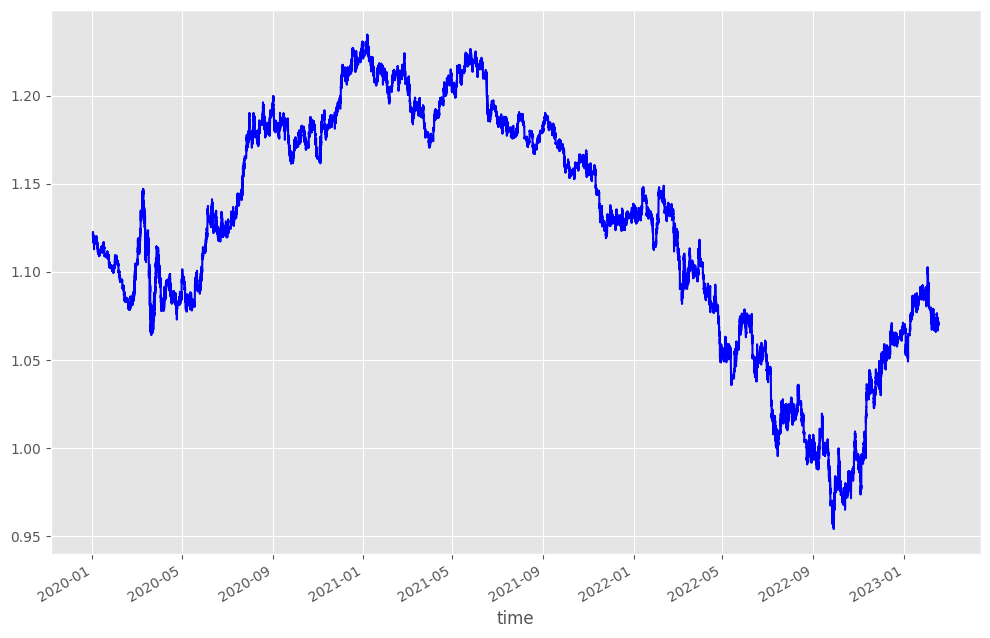

In [212]:
train['close'].plot(figsize=(12,8),color='b')    

In [213]:
# calculate returns
train['returns'] = np.log(train['close'] / train['close'].shift(1))

In [214]:
train['lagged_returns'] = train['returns'].shift(1) 

In [215]:
train

,open,high,low,close,returns,lagged_returns
time,,,,,,
2020-01-02 00:00:00,1.12118,1.12118,1.12073,1.12073,NaN,NaN
2020-01-02 00:15:00,1.12073,1.12152,1.12073,1.12144,0.000633,NaN
2020-01-02 00:30:00,1.12145,1.12157,1.12141,1.12151,0.000062,0.000633
2020-01-02 00:45:00,1.12156,1.12165,1.12142,1.12142,-0.000080,0.000062
2020-01-02 01:00:00,1.12142,1.12216,1.12142,1.12201,0.000526,-0.000080
...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,0.000009
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-0.000093
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-0.000439


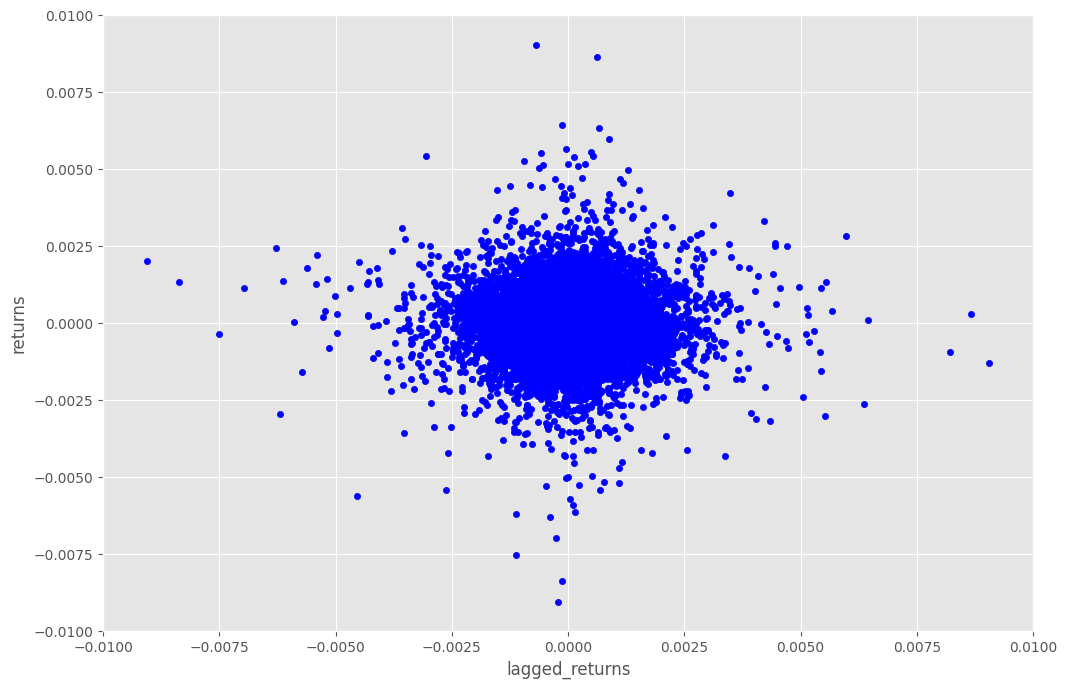

In [216]:
train.iloc[:,-2:].plot(kind = 'scatter', x = 'lagged_returns', y = 'returns', figsize=(12,8), color='b')
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)
plt.show()

In [217]:
train.dropna(inplace=True)

# Simple Linear regression

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lm = LinearRegression(fit_intercept=True)

In [220]:
lm.fit(train['lagged_returns'].to_frame(), train['returns'])

LinearRegression()

In [221]:
slope = lm.coef_
slope

array([-0.02621529])

In [222]:
intercept = lm.intercept_
intercept


-6.116162183674282e-07

In [223]:
train['prediction'] = lm.predict(train['lagged_returns'].to_frame())

In [224]:
train

,open,high,low,close,returns,lagged_returns,prediction
time,,,,,,,
2020-01-02 00:30:00,1.12145,1.12157,1.12141,1.12151,0.000062,0.000633,-1.721416e-05
2020-01-02 00:45:00,1.12156,1.12165,1.12142,1.12142,-0.000080,0.000062,-2.247917e-06
2020-01-02 01:00:00,1.12142,1.12216,1.12142,1.12201,0.000526,-0.000080,1.492218e-06
2020-01-02 01:15:00,1.12201,1.12211,1.12195,1.12211,0.000089,0.000526,-1.440034e-05
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,0.000089,-2.947970e-06
...,...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,0.000009,-8.564530e-07
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-0.000093,1.836855e-06
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-0.000439,1.089926e-05


<function matplotlib.pyplot.show(close=None, block=None)>

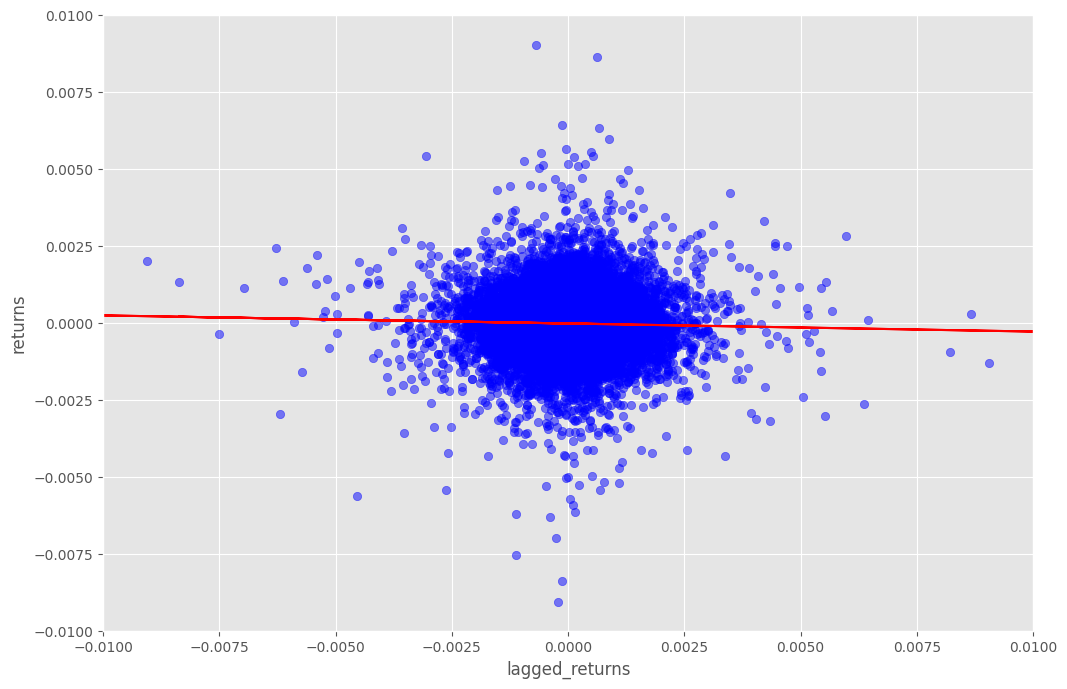

In [225]:
plt.figure(figsize=(12,8))
plt.scatter(train['lagged_returns'], train['returns'], alpha=0.5, label='Data points',color='b')
plt.plot(train['lagged_returns'], train['prediction'], color='r', label='Linear regression line')
plt.xlim(-0.01, 0.01)
plt.ylim(-0.01, 0.01)
plt.xlabel('lagged_returns')
plt.ylabel('returns')
plt.show



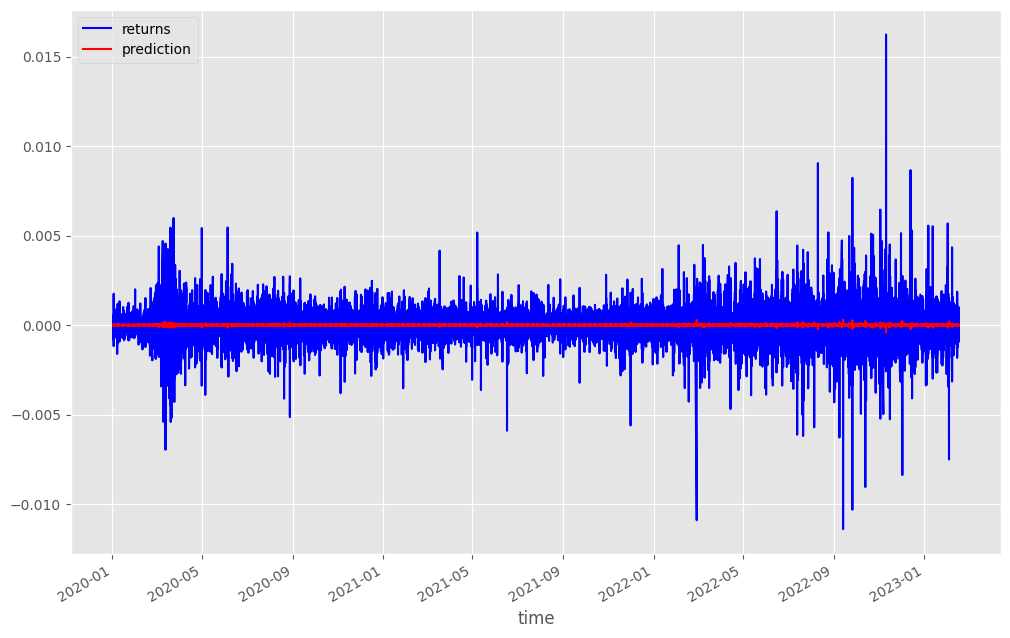

In [226]:
train[['returns','prediction']].plot(figsize=(12,8),color=['b','r'])
plt.show()

In [227]:
# predict market direction
train['prediction'] = np.sign(train['prediction'])

In [228]:
train

,open,high,low,close,returns,lagged_returns,prediction
time,,,,,,,
2020-01-02 00:30:00,1.12145,1.12157,1.12141,1.12151,0.000062,0.000633,-1.0
2020-01-02 00:45:00,1.12156,1.12165,1.12142,1.12142,-0.000080,0.000062,-1.0
2020-01-02 01:00:00,1.12142,1.12216,1.12142,1.12201,0.000526,-0.000080,1.0
2020-01-02 01:15:00,1.12201,1.12211,1.12195,1.12211,0.000089,0.000526,-1.0
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,0.000089,-1.0
...,...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,0.000009,-1.0
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-0.000093,1.0
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-0.000439,1.0


In [229]:
hits = np.sign(train['returns'] * train['prediction']).value_counts() # correct or false pred direction
hits


 1.0    39729
-1.0    37071
 0.0     1171
Name: count, dtype: int64

In [230]:
hits_ratio = hits[1] / sum(hits)
print(f'Hit ratio of direction is: {round(hits_ratio*100,2)}%')

Hit ratio of direction is: 50.95%


# Using multiple regressions models to predict returns

In [231]:
# clear
train = df.iloc[:int(len(df)*0.8)]


In [232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77973 entries, 2020-01-02 00:00:00 to 2023-02-16 13:45:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    77973 non-null  float64
 1   high    77973 non-null  float64
 2   low     77973 non-null  float64
 3   close   77973 non-null  float64
dtypes: float64(4)
memory usage: 3.0 MB


In [233]:
train['returns'] = np.log(train['close'] / train['close'].shift(1))

In [234]:
lags = 5
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    train[col] = train['returns'].shift(lag)
    cols.append(col)
train.dropna(inplace=True)

In [235]:
train

,open,high,low,close,returns,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,0.000089,0.000526,-0.000080,0.000062,0.000633
2020-01-02 01:45:00,1.12209,1.12209,1.12178,1.12189,-0.000169,-0.000027,0.000089,0.000526,-0.000080,0.000062
2020-01-02 02:00:00,1.12189,1.12192,1.12162,1.12164,-0.000223,-0.000169,-0.000027,0.000089,0.000526,-0.000080
2020-01-02 02:15:00,1.12163,1.12170,1.12157,1.12162,-0.000018,-0.000223,-0.000169,-0.000027,0.000089,0.000526
2020-01-02 02:30:00,1.12164,1.12175,1.12158,1.12173,0.000098,-0.000018,-0.000223,-0.000169,-0.000027,0.000089
...,...,...,...,...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,0.000009,0.000140,0.000476,0.000552,-0.000617
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-0.000093,0.000009,0.000140,0.000476,0.000552
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-0.000439,-0.000093,0.000009,0.000140,0.000476


In [236]:
lm = LinearRegression(fit_intercept=True)

lm.fit(train[cols], train['returns'])


LinearRegression()

In [237]:
lm.coef_

array([-0.02644926, -0.00600577, -0.00811304, -0.00390771, -0.00078945])

In [238]:
lm.intercept_

-6.311512149904819e-07

In [239]:
lm.intercept_


-6.311512149904819e-07

In [240]:
train['prediction'] = lm.predict(train[cols])

In [241]:
train['prediction'] =  np.sign(train['prediction'])

In [242]:
train

,open,high,low,close,returns,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
time,,,,,,,,,,,
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,0.000089,0.000526,-0.000080,0.000062,0.000633,-1.0
2020-01-02 01:45:00,1.12209,1.12209,1.12178,1.12189,-0.000169,-0.000027,0.000089,0.000526,-0.000080,0.000062,-1.0
2020-01-02 02:00:00,1.12189,1.12192,1.12162,1.12164,-0.000223,-0.000169,-0.000027,0.000089,0.000526,-0.000080,1.0
2020-01-02 02:15:00,1.12163,1.12170,1.12157,1.12162,-0.000018,-0.000223,-0.000169,-0.000027,0.000089,0.000526,1.0
2020-01-02 02:30:00,1.12164,1.12175,1.12158,1.12173,0.000098,-0.000018,-0.000223,-0.000169,-0.000027,0.000089,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,0.000009,0.000140,0.000476,0.000552,-0.000617,-1.0
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-0.000093,0.000009,0.000140,0.000476,0.000552,-1.0
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-0.000439,-0.000093,0.000009,0.000140,0.000476,1.0


In [243]:
train['prediction'].value_counts()

prediction
-1.0    41734
 1.0    36233
Name: count, dtype: int64

In [244]:
hits = np.sign(train['returns'] * train['prediction']).value_counts()
hits # correct or false prediction

 1.0    39907
-1.0    36889
 0.0     1171
Name: count, dtype: int64

In [245]:
hits_ratio = hits[1] / sum(hits)
print(f'Hit ratio of direction is: {round(hits_ratio*100,2)}%')

Hit ratio of direction is: 51.18%


# In-Sample backtesting and the look-ahead bias

In [246]:
train

,open,high,low,close,returns,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
time,,,,,,,,,,,
2020-01-02 01:30:00,1.12211,1.12217,1.12207,1.12208,-0.000027,0.000089,0.000526,-0.000080,0.000062,0.000633,-1.0
2020-01-02 01:45:00,1.12209,1.12209,1.12178,1.12189,-0.000169,-0.000027,0.000089,0.000526,-0.000080,0.000062,-1.0
2020-01-02 02:00:00,1.12189,1.12192,1.12162,1.12164,-0.000223,-0.000169,-0.000027,0.000089,0.000526,-0.000080,1.0
2020-01-02 02:15:00,1.12163,1.12170,1.12157,1.12162,-0.000018,-0.000223,-0.000169,-0.000027,0.000089,0.000526,1.0
2020-01-02 02:30:00,1.12164,1.12175,1.12158,1.12173,0.000098,-0.000018,-0.000223,-0.000169,-0.000027,0.000089,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-16 12:45:00,1.07074,1.07129,1.07041,1.07063,-0.000093,0.000009,0.000140,0.000476,0.000552,-0.000617,-1.0
2023-02-16 13:00:00,1.07063,1.07067,1.07010,1.07016,-0.000439,-0.000093,0.000009,0.000140,0.000476,0.000552,-1.0
2023-02-16 13:15:00,1.07016,1.07020,1.06946,1.06946,-0.000654,-0.000439,-0.000093,0.000009,0.000140,0.000476,1.0


In [247]:
train['strategy'] = train['prediction'] * train['returns']

In [248]:
train['creturns'] = train['returns'].cumsum().apply(np.exp)
train['cstrategy'] = train['strategy'].cumsum().apply(np.exp)


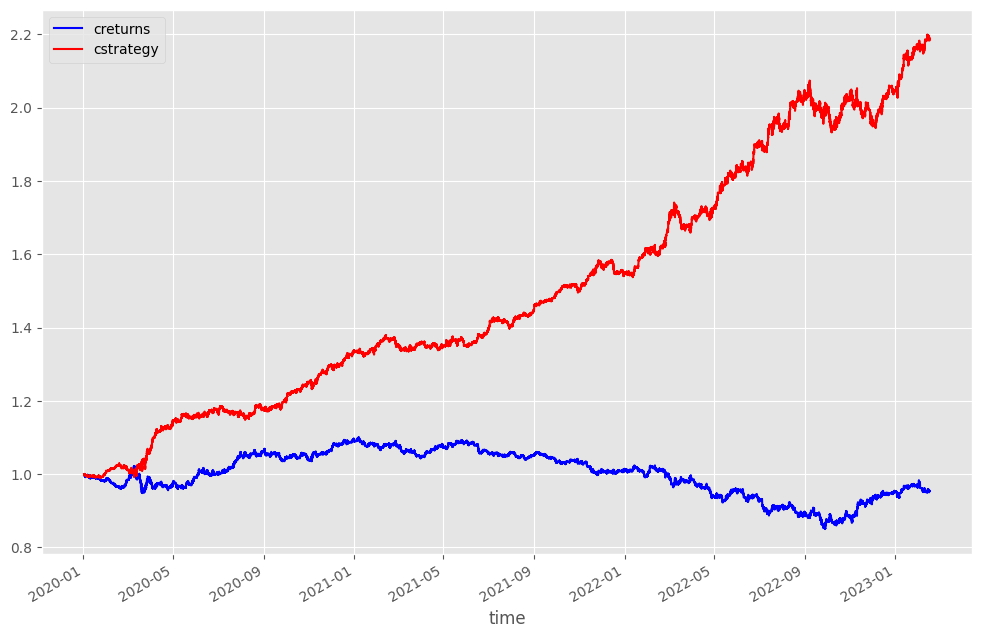

In [249]:
train[['creturns','cstrategy']].plot(figsize=(12,8),color=['b','r'])
plt.show()

Just vectorised backtest without cost, etc...

In [250]:
train['trades'] =train['prediction'].diff().fillna(0).abs()

In [251]:
train.trades.value_counts()

trades
0.0    45277
2.0    32690
Name: count, dtype: int64

# Out-sample forward testing

In [252]:
test

,open,high,low,close
time,,,,
2023-02-16 14:00:00,1.07051,1.07081,1.07035,1.07057
2023-02-16 14:15:00,1.07057,1.07079,1.06966,1.06973
2023-02-16 14:30:00,1.06975,1.07020,1.06929,1.07019
2023-02-16 14:45:00,1.07019,1.07026,1.06917,1.06937
2023-02-16 15:00:00,1.06941,1.07012,1.06941,1.06999
...,...,...,...,...
2023-11-28 14:15:00,1.09586,1.09623,1.09525,1.09536
2023-11-28 14:30:00,1.09536,1.09581,1.09519,1.09562
2023-11-28 14:45:00,1.09561,1.09564,1.09472,1.09505


In [253]:
test['returns'] = np.log(test['close'] / test['close'].shift(1))

In [254]:
lags = 5
cols = []

for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    test[col] = test['returns'].shift(lag)
    cols.append(col)
test.dropna(inplace=True)


In [255]:
test

,open,high,low,close,returns,lag_1,lag_2,lag_3,lag_4,lag_5
time,,,,,,,,,,
2023-02-16 15:30:00,1.07024,1.07025,1.06731,1.06885,-0.001318,0.000252,0.000580,-0.000767,0.000430,-0.000785
2023-02-16 15:45:00,1.06884,1.06889,1.06698,1.06793,-0.000861,-0.001318,0.000252,0.000580,-0.000767,0.000430
2023-02-16 16:00:00,1.06792,1.06892,1.06757,1.06806,0.000122,-0.000861,-0.001318,0.000252,0.000580,-0.000767
2023-02-16 16:15:00,1.06807,1.06853,1.06628,1.06649,-0.001471,0.000122,-0.000861,-0.001318,0.000252,0.000580
2023-02-16 16:30:00,1.06649,1.06753,1.06642,1.06683,0.000319,-0.001471,0.000122,-0.000861,-0.001318,0.000252
...,...,...,...,...,...,...,...,...,...,...
2023-11-28 14:15:00,1.09586,1.09623,1.09525,1.09536,-0.000465,0.000794,-0.000429,-0.000155,0.000009,0.000393
2023-11-28 14:30:00,1.09536,1.09581,1.09519,1.09562,0.000237,-0.000465,0.000794,-0.000429,-0.000155,0.000009
2023-11-28 14:45:00,1.09561,1.09564,1.09472,1.09505,-0.000520,0.000237,-0.000465,0.000794,-0.000429,-0.000155


In [256]:
test['prediction'] = lm.predict(test[cols])

In [257]:
test

,open,high,low,close,returns,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
time,,,,,,,,,,,
2023-02-16 15:30:00,1.07024,1.07025,1.06731,1.06885,-0.001318,0.000252,0.000580,-0.000767,0.000430,-0.000785,-0.000006
2023-02-16 15:45:00,1.06884,1.06889,1.06698,1.06793,-0.000861,-0.001318,0.000252,0.000580,-0.000767,0.000430,0.000031
2023-02-16 16:00:00,1.06792,1.06892,1.06757,1.06806,0.000122,-0.000861,-0.001318,0.000252,0.000580,-0.000767,0.000026
2023-02-16 16:15:00,1.06807,1.06853,1.06628,1.06649,-0.001471,0.000122,-0.000861,-0.001318,0.000252,0.000580,0.000011
2023-02-16 16:30:00,1.06649,1.06753,1.06642,1.06683,0.000319,-0.001471,0.000122,-0.000861,-0.001318,0.000252,0.000049
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-28 14:15:00,1.09586,1.09623,1.09525,1.09536,-0.000465,0.000794,-0.000429,-0.000155,0.000009,0.000393,-0.000018
2023-11-28 14:30:00,1.09536,1.09581,1.09519,1.09562,0.000237,-0.000465,0.000794,-0.000429,-0.000155,0.000009,0.000011
2023-11-28 14:45:00,1.09561,1.09564,1.09472,1.09505,-0.000520,0.000237,-0.000465,0.000794,-0.000429,-0.000155,-0.000009


In [258]:
test['prediction'] = np.sign(test['prediction'])

In [259]:
test['prediction'].value_counts()   

prediction
-1.0    10543
 1.0     8945
Name: count, dtype: int64

In [260]:
hits = np.sign(test['returns'] * test['prediction']).value_counts()
hits

 1.0    9865
-1.0    9348
 0.0     275
Name: count, dtype: int64

In [261]:
hits_ratio = hits[1] / sum(hits)
print(f'Hit ratio of direction is: {round(hits_ratio*100,2)}%')

Hit ratio of direction is: 50.62%


In [262]:
test['strategy'] = test['prediction'] * test['returns']

In [263]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)

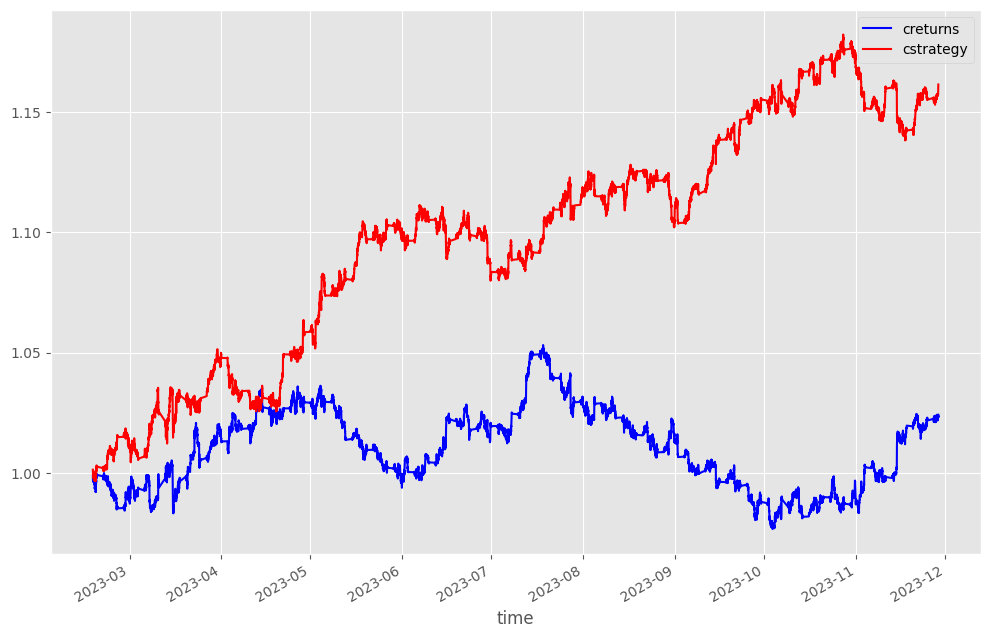

In [264]:
test[['creturns','cstrategy']].plot(figsize=(12,8),color=['b','r'])
plt.show()

In [265]:
test['trades'] = test['prediction'].diff().fillna(0).abs()
test['trades'].value_counts()

trades
0.0    11457
2.0     8031
Name: count, dtype: int64


Source and credit of Alexander Hagmann and his course 'Algorithmic Trading A-Z with Python, Machine Learning & AWS'!